In [1]:
import sys
sys.path += ['layers']
import numpy as np
from data_utils import get_CIFAR10_data

from init_base_model import init_base_model
from train_custom import train_custom

%load_ext autoreload
%autoreload 2

### Load Data & Partition

In [2]:
X_train, y_train, X_test, y_test = get_CIFAR10_data()

### TRAIN DATA TINY
n_train = 100
X_train_tiny = X_train[:,:,:, :n_train]
y_train_tiny = y_train[:n_train]

### TEST/VALIDATION DATA TINY
n_test = 1000
X_test_tiny = X_test[:,:,:,:n_test]
y_test_tiny = y_test[:n_test]

Train data shape:  (32, 32, 3, 50000)
Train labels shape:  (50000,)
Test data shape:  (32, 32, 3, 10000)
Test labels shape:  (10000,)


In [4]:
# SET PARAMS HERE
learning_rate = 1e-2 # already did 1e3, 1e4
weight_decay = 1e-5 # lready did 1e-6
batch_size = 64 # already did 32
live_plot_on = False
itr_to_plot = 50
verbose = True
early_stopping_on = True
calculate_test = True
itr_to_test = 100
numIters = 15000 # already did 10k
save_file = f"\\test_full_dropout_model_1"
p_act = 1

# other params
# save_plot - if you want to save performance plot out (True)
# save path - where to put train model and plot (\results foler)

# PACK INTO PARAMS DICT
params = {
    "learning_rate" :learning_rate, # default 0.01
    "weight_decay":weight_decay ,   # default 0.0005
    "batch_size" : batch_size,      # default 128
    "save_file" : save_file,        # default model
    "live_plot_on" : live_plot_on,
    "itr_to_plot" : itr_to_plot,    # how many iterations until live plot refresh
    "verbose" : verbose,
    "early_stopping_on" : early_stopping_on, # defualt True
    "calculate_test": calculate_test,        # bool for validation checks, default true
    "itr_to_test": itr_to_test,              # n iterations between validation check
    "X_test" : X_test_tiny,                  # validation set, can be empty
    "y_test" : y_test_tiny,                  # validation set, can be empty
    "p_act" : p_act                       # for dropout percentage to keep active 
    }

In [5]:
model = init_base_model()

Input size:
[32, 32, 3]
Layer 0 output size: 
(28, 28, 3)
Layer 1 output size: 
(14, 14, 3)
Layer 2 output size: 
(14, 14, 3)
Layer 3 output size: 
(588,)
Layer 4 output size: 
(10,)
Final output size:
(10,)
Provided output size (should match above):
10
(Batch dimension not included)


*****Starting training! p: 1,bs: 64, lr: 0.01 wd: 1e-05, n_images: 50000, n_test: 1000*****
Fished itr 0 / 15000; cost: 3.30463 train: 0.109375 val: 0.087
Fished itr 1 / 15000; cost: 2.46692 train: 0.140625 val: 0.087
Fished itr 2 / 15000; cost: 2.66524 train: 0.125 val: 0.087
Fished itr 3 / 15000; cost: 2.67216 train: 0.078125 val: 0.087
Fished itr 4 / 15000; cost: 2.56092 train: 0.15625 val: 0.087
Fished itr 5 / 15000; cost: 2.72962 train: 0.140625 val: 0.087
Fished itr 6 / 15000; cost: 2.28904 train: 0.203125 val: 0.087
Fished itr 7 / 15000; cost: 2.60437 train: 0.1875 val: 0.087
Fished itr 8 / 15000; cost: 2.52917 train: 0.171875 val: 0.087
Fished itr 9 / 15000; cost: 2.43669 train: 0.140625 val: 0.087
Fished itr 10 / 15000; cost: 2.44435 train: 0.1875 val: 0.087
Fished itr 11 / 15000; cost: 2.35917 train: 0.1875 val: 0.087
Fished itr 12 / 15000; cost: 2.29516 train: 0.125 val: 0.087
Fished itr 13 / 15000; cost: 2.37066 train: 0.109375 val: 0.087
Fished itr 14 / 15000; cost: 2.3595

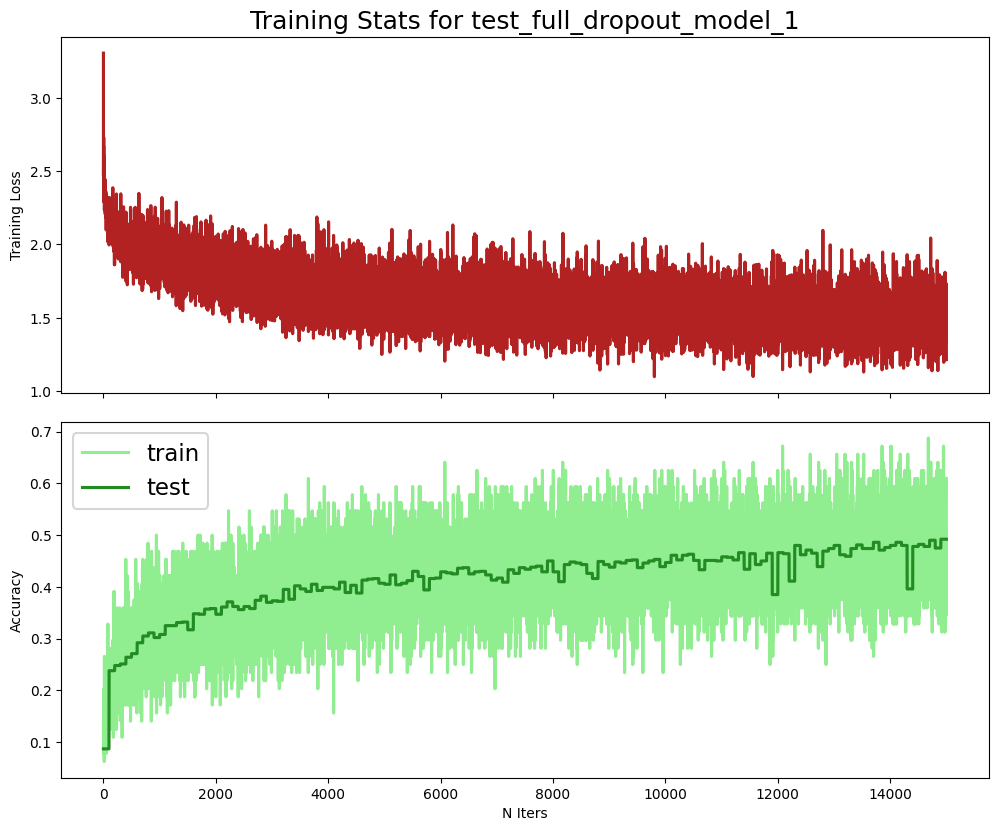

In [6]:
trained_model, loss, accuracy, test_accuracy, time = train_custom(
    model,
    X_train, 
    y_train, 
    params, 
    numIters
    )

## EVAL 

In [7]:
from utils import save_out_model_info
from utils import SAVE_PATH
from utils import test

import pandas as pd

try:
    loss
except:
    import pandas as pd
    time = 10223.45
    save_file = params["save_file"]
    model_fit_info_df = pd.read_csv(SAVE_PATH + save_file + '_fit_data.csv')
    loss = model_fit_info_df["loss"]
    accuracy = model_fit_info_df["train_acc"]
    test_accuracy = model_fit_info_df["val_acc"]
    
    trained_model = np.load(SAVE_PATH + save_file + '.npz', allow_pickle=True)
    trained_model = dict(model)

In [8]:
eval_accuracy = test(trained_model, X_test, y_test)

running test on 10000 images
accuracy is 0.469


In [9]:
fit_df, summary_df = save_out_model_info(
    params, 
    loss,
    train_accuracy = accuracy,
    val_accuracy = test_accuracy,
    time=time, 
    save_and_return=True,
    eval_accuracy = eval_accuracy)

\test_full_dropout_model_1 model fit df saved
\dropout_model_summary created


In [10]:
summary_df

,p_act,learning_rate,weight_decay,save_file,batch_size,numIters,time,eval_acc,loss_min,loss_mean,loss_max,train_acc_min,train_acc_mean,train_acc_max,val_acc_min,val_acc_mean,val_acc_max
0,1,0.01,0.00001,\test_full_dropout_model_1,64,15000,170.39,0.469,1.097353,1.630527,1.630527,0.0625,0.417892,0.417892,0.087,0.41396,0.41396


In [11]:
fit_df.describe()

,loss,train_acc,val_acc
count,15000.000000,15000.000000,15000.000000
mean,1.630527,0.417892,0.413960
std,0.196515,0.084560,0.060258
min,1.097353,0.062500,0.087000
25%,1.492872,0.375000,0.393000
50%,1.604165,0.421875,0.429000
75%,1.744828,0.468750,0.452000
max,3.304627,0.687500,0.492000
